## FNCE30012: Foundations of Fintech - Assignment 4
This assignment builds on Lectures 7 to 9 and on Tutorials 6 and 7. You might want to consider using some of the Python code discussed in those lectures and tutorials to answer some of the questions below.

**Important:** It is important that you *do not* change the type (markdwon vs. code) of any cell, *nor* copy/paste/duplicate any cell! If the cell type is markdown, you are supposed to write text, not code, and vice versa. Provide your answer to each question in the allocated cell. *Do not* create additional cells. Answers provided in any other cell will **not** be marked. *Do not* rename the assignment files. All files should be left as is in the assignment directory.

### Task
You are given two datasets:
1. A file called `Assignment4-data.csv`, that contains financial news (headlines) and daily returns for Apple (AAPL). Relying on this dataset, your role as a FinTech student is to explore the relationship between financial news and stock returns.  
  
  
2. A file called `AAPL_returns.csv`, that contains the daily returns for Apple (AAPL).

#### Helpful commands
You may find the following commands helpful to complete some of the questions.
1. How to create a new column using data from existing column? Recall that, in Tutorial 7, we worked with a variable called `FSscore`. Suppose we wanted to divide all the values of this variable by `100` and store the outcome in a new column. This can be done in one step. The code `df['FSscore_scaled'] = df['FSscore']/100` creates a new column with the name `FSscore_scaled` and stores the modified values.
  
 
2. How to separate a string variable into a list of strings? The method `split()` splits a string into a list based on a specified separator. The default separator is any white space. However, one can specify the applied separator as an argument. For example, the code `"a,b,c".split(",")` splits the string `"a,b,c"` into the list `[a, b, c]`.  
  

3. You can use string functions such as `split()` on a `Pandas` dataframe column by using the `str` attribute. For example, `df['alphabets'].str.split(",")` returns a series (consider a series as a dataframe with one column) that contains a list obtained by running the split function on each entry in the column named `alphabets`.  
  

4. How to chain multiple string operations in `Pandas`? Note that a string function on a `Pandas` column returns a series. One can then use another string function on this series to chain multiple operations. For example, the cell below first converts the string to upper case and then calls the split function.  
  

5. How to combine two or more data frames? For this purpose, one can use the `concat` function from `Pandas`. To combine the dataframes to match indices you can use the `axis=1` argument. Please see https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html for examples.  
  
  

Please run the following cell to import the required libraries and for string operations example.

In [1]:
## Execute this cell

####################### Package Setup ##########################

# Disable FutureWarning for better aesthetics.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# essential libraries for this assignment
from finml import *
import numpy as np
import pandas as pd
%matplotlib inline

# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# suppress warnings for deprecated methods from TensorFlow
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

################################################################

# Example of string operations
import pandas as pd
example_data = {'alphabets':['a,b,c', 'd,e,f', 'a,z,x', 'a,s,p']} 
example_df = pd.DataFrame(example_data) 

# Chain two string operations
example_df['alphabets'].str.upper().str.split(",")

0    [A, B, C]
1    [D, E, F]
2    [A, Z, X]
3    [A, S, P]
Name: alphabets, dtype: object

### Data exploration and transformation
The dataset has the following three columns:
1. date: This column contains the date of the observation.  
  
  
2. headlines: This column contains the concatenation of headlines for that date. The headlines are separated by the `<end>` string. For example, if there are three headlines `h1`, `h2`, and `h3` on a given day, the headline cell for that day will be the string `h1<end>h2<end>h3`.  
  
  
3. returns: This column contains the daily returns.

In your assessment, please address the following questions.

### Question 1 (1.5 marks)
Load the dataset in a `Pandas` dataframe and write a Python code that plots the time series of the daily Apple returns (returns on the y-axis and dates on the x-axis). Make sure your plot's axes are appropriately labelled.

**Note:** Please use `df` as the variable name for the dataframe and the `parse_dates` argument to correctly parse the date column.

### Answer 1

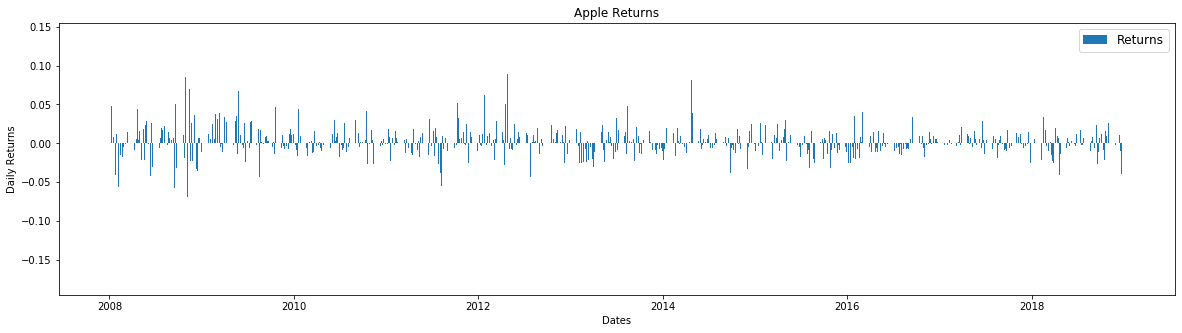

In [47]:
from matplotlib import pyplot as plt


df = pd.read_csv('AAPL_returns.csv', parse_dates=[0]) 
plt.figure(figsize=(20,5))
plt.bar(x=df['date'], height=df['RET'])
plt.xlabel("Dates")
plt.ylabel("Daily Returns")
plt.title("Apple Returns")
plt.legend(['Returns'], fontsize=12)

plt.show()

### Question 2 (1.5 marks)
Write a Python code that plots the time series of daily headline frequencies (the number of headlines per day on the y-axis and the corresponding date on the x-axis). Make sure your plot's axes are appropriately labelled.

### Answer 2

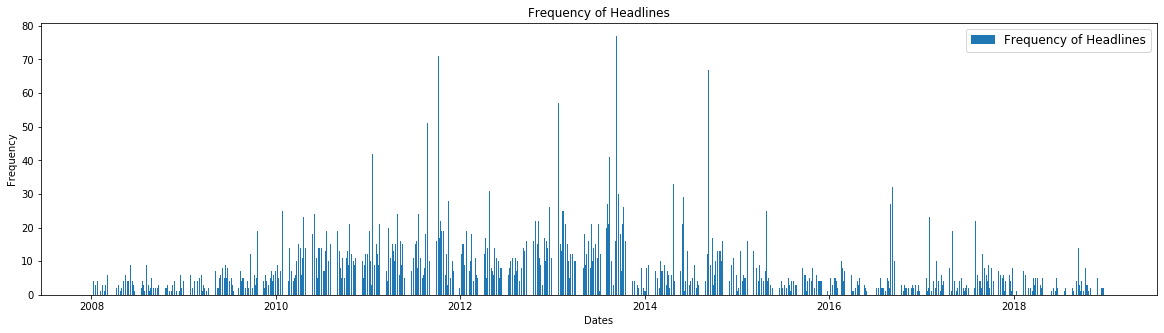

In [48]:
from matplotlib import pyplot as plt


df = pd.read_csv('Assignment4-data.csv', parse_dates=[1]) 
df['headline_freq'] = df['headlines'].str.split("<end>").str.len()


plt.figure(figsize=(20,5))
plt.bar(x=df['date'], height=df['headline_freq'])
plt.xlabel("Dates")
plt.ylabel("Frequency")
plt.title("Frequency of Headlines")
plt.legend(['Frequency of Headlines'], fontsize=12)
plt.show()

### Question 3 (2 marks)
We will use neural networks to explore the relationship between the content of financial news and the direction of stock returns, i.e., their classification into positive or negative returns.

1. Create a new column called `returns_direction` in the dataframe that classifies daily returns based on their direction: it assigns a given return a value of 1, if the return is positive (i.e, greater than 0), and a value of 0 otherwise. You may find the Numpy function `where()` useful for this question.

2. Count the number of days on which the stock had positive and non-positive returns, respectively.

### Answer 3

In [49]:
df = pd.read_csv('Assignment4-data.csv')

# Creates return_direction column 
df["returns_direction"] = np.where(df["returns"]>0, 1, 0)

# Counts the number of days the stock had positive and non-positive returns
num_days_return = df['returns_direction'].value_counts()
# 1 means positive
# 0 means non-positive
print("The number of days with positive days: {} ".format(num_days_return[1]))
print("The number of days with non-positive days: {} ".format(num_days_return[0]))

The number of days with positive days: 1349 
The number of days with non-positive days: 1221 


### Question 4 (3 marks)
For this question please restrict your computations to the first 100 headline dates. You can select them by using the `head` function of `Pandas`. Calculate the tf-idf metric for the following word and headline(s) pairs:
1. Word "apple" in headlines with date 2008-01-07. Store this value in a variable called `aaple_tfidf`.
2. Word "samsung" in headlines with date 2008-01-17. Store this value in a variable called `samsung_tfidf`.
3. Word "market" for news headlines with dates 2008-03-06. Store this value in a variable called `market_tfidf`.

Please write a Python code that calculates the metrics from the `df` dataframe.

### Answer 4

In [56]:
import string

df = pd.read_csv('Assignment4-data.csv')
df = df.head(n=100)


#a loop that separates (or splits) each word in the document from one another, creating a list of all words
raw_document_words = [doc.split() for doc in df['headlines']]

document_words = []
for word_list in raw_document_words:
    temp_list = []
    for word in word_list:
        temp_list.append(word.translate(str.maketrans('', '', string.punctuation)))
    document_words.append(temp_list)
    
#turn our list into a sorted array (alphabetical order) which is a set (i.e. no duplicate words)
vocab = sorted(set(sum(document_words, [])))
#create a dictionary that takes each word as a key and their alphabetical order as a value
vocab_dict = {k: i + 1 for i, k in enumerate(vocab)}
#create a mxn TF matrix and initialise it with zeros. mxn because we have m (100) headlines and n words in our vocab
tf = np.zeros((len(df['headlines']), len(vocab)), dtype=int)
#for each word in our list of words
for i, doc in enumerate(document_words):
    for word in doc:
        if word == 'apple' or word == 'samsung' or word == 'market':
            tf[i, vocab_dict[word] - 1] += 1


idf = np.log(tf.shape[0]/tf.astype(bool).sum(axis=0))

tf_idf = tf * idf

for i in range(len(df)):
    if df.iloc[i].date == '2008-01-07':
        aaple_tfidf = tf_idf[i][vocab_dict['apple'] - 1]
    if df.iloc[i].date == '2008-01-17':
        samsung_tfidf = tf_idf[i][vocab_dict['samsung'] - 1]
    if df.iloc[i].date == '2008-03-06':
        market_tfidf = tf_idf[i][vocab_dict['market'] - 1]



print("NOTE: the following tf-idf scores are with a small amount of data cleaning (removing punctuation from words)")
print("The apple tf-idf is: {}".format(aaple_tfidf))
print("The samsung tf-idf is: {}".format(samsung_tfidf))
print("The market tf-idf is: {}".format(market_tfidf))


NOTE: the following tf-idf scores are with a small amount of data cleaning (removing punctuation from words)
The apple tf-idf is: 1.0216512475319814
The samsung tf-idf is: 0.0
The market tf-idf is: 2.5257286443082556


### Question 5 (3 marks)
Build and train a **one**-layer neural network with two units (neurons) to explain return directions based on financial news. Report and interpret the following three performance measures: "Precision", "Recall", and "Accuracy". According to your opinion, which performance measure(s) is (are) most important in the context of linking news headlines to stock returns and why?

### Answer 5 - Code

In [51]:
df = pd.read_csv('Assignment4-data.csv')

# Creates return_direction column 
df["returns_direction"] = np.where(df["returns"]>0, 1, 0)

X_headlines = df.headlines.values
y = df.returns_direction
data = split_by_threshold(X_headlines, y, test_size=0.4,)
(train_texts, y_train, test_texts, y_test) = data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)


data = (X_train, y_train, X_test, y_test)
model = build_model(X_train.shape[1:], layers=1, units=2);
model = train_model(data, model)
evaluate(model, data)



Train on 1542 samples, validate on 1028 samples
Epoch 1/1000
1542/1542 - 1s - loss: 0.6931 - acc: 0.5097 - val_loss: 0.6930 - val_acc: 0.5224
Epoch 2/1000
1542/1542 - 1s - loss: 0.6924 - acc: 0.5266 - val_loss: 0.6930 - val_acc: 0.5224
Epoch 3/1000
1542/1542 - 1s - loss: 0.6917 - acc: 0.5266 - val_loss: 0.6929 - val_acc: 0.5224
Epoch 4/1000
1542/1542 - 1s - loss: 0.6909 - acc: 0.5266 - val_loss: 0.6929 - val_acc: 0.5224
Epoch 5/1000
1542/1542 - 1s - loss: 0.6901 - acc: 0.5266 - val_loss: 0.6928 - val_acc: 0.5224
Epoch 6/1000
1542/1542 - 1s - loss: 0.6892 - acc: 0.5266 - val_loss: 0.6928 - val_acc: 0.5224
Epoch 7/1000
1542/1542 - 1s - loss: 0.6883 - acc: 0.5266 - val_loss: 0.6927 - val_acc: 0.5224
Epoch 8/1000
1542/1542 - 1s - loss: 0.6874 - acc: 0.5266 - val_loss: 0.6927 - val_acc: 0.5224
Epoch 9/1000
1542/1542 - 1s - loss: 0.6865 - acc: 0.5266 - val_loss: 0.6926 - val_acc: 0.5224
Epoch 10/1000
1542/1542 - 1s - loss: 0.6855 - acc: 0.5266 - val_loss: 0.6926 - val_acc: 0.5224
Epoch 11/10

### Answer 5 - Text

Precision is for all the times True is classified by the model, how often is it genuinely True. 
Precision = True Positives / (True Positives + False Positives)
This is the proportion of all the times the model classified the price going up, how often was it correct.

Recall is for all the times the correct classification was True how often did the model classify it correctly.
Recall = True Positives / (True Positives + False Negatives)
This is the proportion of all the times the price went up how often did the model classify it correctly.

Accuracy is how many times the model made a correct classification. 
Accuracy = (True Positives + True Negatives) / Total
This is the proportion of times the model predicted the price going up or not.


Since the recall is 1.0 and the precision and accuracy are the same, we can deduce that the model always says that the price is going up. The model is classifying the class which is most common (True, which occurs 52.23% of the time). This is likely due to the one layer, two-unit neural network not understanding the complexity of the dataset and simply classifing all classifications as True. This is a very bad model.


Assuming that you are only making buy orders (likely to be the case since the interesting class is stock price going up):   
Of these three performance measures, the most important evaluation metric for linking news headlines to stock returns is Precision. This is because the cost of false positives is high. An investor would not want a model that incorrectly classifies the stock price going up when it goes down/doesn't change in reality. If you have a high precision that means when you are predicting positive returns, there is a high probability you are correct. An investor would prefer a model that predicts True with high certainty even though it may mean missing out on potential gains (recall), if the model can guarantee price rises then that is enough.
An investor would not want to rely on an algorithm that classifies rises incorrectly.


<b>“The stock market is a no-called-strike game. You don’t have to swing at everything – you can wait for your pitch." - Warren Buffet</b>



  | Set | Precision  | Recall | Accuracy |
| --------- | -----:| -----:| -----:|
| Test | 0.5223735408560312 | 1.0 | 0.5223735408560312 |

### Question 6 (3 marks)
Explore different neural network models by changing the number of layers and units. You can use up to three layers and five units. 

Complete the table below by adding your results for the **test** data set. You should duplicate the table format in your own markdown cell and replace the "-" placeholders with the corresponding values. Discuss your findings for both the test and train data sets.

| Num. Layers  | Num. Units           | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 1 | 1 | - | - | - |
| 2 | 3 | - | - | - |
| 3 | 5 | - | - | - |

### Answer 6 - Code

In [52]:
df = pd.read_csv('Assignment4-data.csv')

# Creates return_direction column 
df["returns_direction"] = np.where(df["returns"]>0, 1, 0)
df.head()
X_headlines = df.headlines.values
y = df.returns_direction
data = split_by_threshold(X_headlines, y, test_size=0.4,)
(train_texts, y_train, test_texts, y_test) = data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)
data = (X_train, y_train, X_test, y_test)


model = build_model(X_train.shape[1:], layers=1, units=1);
model = train_model(data, model)
evaluate(model, data)

model = build_model(X_train.shape[1:], layers=2, units=3);
model = train_model(data, model)
evaluate(model, data)

model = build_model(X_train.shape[1:], layers=3, units=5);
model = train_model(data, model)
evaluate(model, data)

Train on 1542 samples, validate on 1028 samples
Epoch 1/1000
1542/1542 - 1s - loss: 0.6931 - acc: 0.4987 - val_loss: 0.6930 - val_acc: 0.5224
Epoch 2/1000
1542/1542 - 1s - loss: 0.6926 - acc: 0.5266 - val_loss: 0.6930 - val_acc: 0.5224
Epoch 3/1000
1542/1542 - 1s - loss: 0.6920 - acc: 0.5266 - val_loss: 0.6929 - val_acc: 0.5224
Epoch 4/1000
1542/1542 - 1s - loss: 0.6915 - acc: 0.5266 - val_loss: 0.6929 - val_acc: 0.5224
Epoch 5/1000
1542/1542 - 1s - loss: 0.6909 - acc: 0.5266 - val_loss: 0.6928 - val_acc: 0.5224
Epoch 6/1000
1542/1542 - 1s - loss: 0.6902 - acc: 0.5266 - val_loss: 0.6928 - val_acc: 0.5224
Epoch 7/1000
1542/1542 - 1s - loss: 0.6896 - acc: 0.5266 - val_loss: 0.6927 - val_acc: 0.5224
Epoch 8/1000
1542/1542 - 1s - loss: 0.6889 - acc: 0.5266 - val_loss: 0.6926 - val_acc: 0.5224
Epoch 9/1000
1542/1542 - 1s - loss: 0.6883 - acc: 0.5266 - val_loss: 0.6926 - val_acc: 0.5224
Epoch 10/1000
1542/1542 - 1s - loss: 0.6876 - acc: 0.5266 - val_loss: 0.6925 - val_acc: 0.5224
Epoch 11/10

Epoch 43/1000
1542/1542 - 1s - loss: 0.6744 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 44/1000
1542/1542 - 1s - loss: 0.6737 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 45/1000
1542/1542 - 1s - loss: 0.6730 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 46/1000
1542/1542 - 1s - loss: 0.6723 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 47/1000
1542/1542 - 1s - loss: 0.6715 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 48/1000
1542/1542 - 1s - loss: 0.6708 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 49/1000
1542/1542 - 1s - loss: 0.6700 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 50/1000
1542/1542 - 1s - loss: 0.6693 - acc: 0.5266 - val_loss: 0.6919 - val_acc: 0.5224
Epoch 51/1000
1542/1542 - 1s - loss: 0.6685 - acc: 0.5266 - val_loss: 0.6919 - val_acc: 0.5224
Epoch 52/1000
1542/1542 - 1s - loss: 0.6677 - acc: 0.5266 - val_loss: 0.6919 - val_acc: 0.5224
Epoch 53/1000
1542/1542 - 1s - loss: 0.6669 - acc:

### Answer 6 - Text

| Num. Layers  | Num. Units           | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 1 | 1 | 0.5223735408560312 | 1.0 | 0.5223735408560312 |
| 2 | 3 | 0.5223735408560312 | 1.0 | 0.5223735408560312 |
| 3 | 5 | 0.5256975036710719 | 0.6666666666666666 | 0.5116731517509727 |
  
  
The first two neural networks (1/1 and 2/3) the model is again just always guessing True for each instance. This is indicated by the recall being 1.0 and the precision and accuracy being the same. This would be caused by the model not comprehending the complexity of the dataset and just classifying the class which is most common (True, which occurs 52.23% of the time). As the number of layers and units increase to 3 and 5 respectively the models starts classifying instances properly which is reflected in the precision rising and the recall dropping. of the three neural networks tested, 3/5 is the best.




### Question 7 (3 marks)
Explore the effects of different splits between the training and testing data on the performance of a given neural network model. 

Complete the table below by adding your results. You should duplicate the table format in your own markdown cell and replace the "-" placeholders with the corresponding values. Discuss your findings.

Complete the table below by adding your results for the **test** data set. You should use the same markdown format and simply replace the "-" placeholders with the corresponding values. Discuss your findings for the different test and train data sets.

| Num. Layers/Num. Units| Train/Test split | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 2/3 | 90/10 | - |- |- |
| 3/5 | 90/10 | - |- |- |
| 2/3 | 60/40 | - |- |- |
| 3/5 | 60/40 | - |- |- |

### Answer 7 - Code

In [53]:
df = pd.read_csv('Assignment4-data.csv')

# Creates return_direction column 
df["returns_direction"] = np.where(df["returns"]>0, 1, 0)

X_headlines = df.headlines.values
y = df.returns_direction
data = split_by_threshold(X_headlines, y, test_size=0.1,)
(train_texts, y_train, test_texts, y_test) = data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)
data = (X_train, y_train, X_test, y_test)


model = build_model(X_train.shape[1:], layers=2, units=3);
model = train_model(data, model)
evaluate(model, data)
model = build_model(X_train.shape[1:], layers=3, units=5);
model = train_model(data, model)
evaluate(model, data)


data = split_by_threshold(X_headlines, y, test_size=0.4,)
(train_texts, y_train, test_texts, y_test) = data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)
data = (X_train, y_train, X_test, y_test)


model = build_model(X_train.shape[1:], layers=2, units=3);
model = train_model(data, model)
evaluate(model, data)
model = build_model(X_train.shape[1:], layers=3, units=5);
model = train_model(data, model)
evaluate(model, data)

Train on 2313 samples, validate on 257 samples
Epoch 1/1000
2313/2313 - 2s - loss: 0.6932 - acc: 0.4777 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 2/1000
2313/2313 - 1s - loss: 0.6931 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 3/1000
2313/2313 - 1s - loss: 0.6930 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 4/1000
2313/2313 - 1s - loss: 0.6929 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 5/1000
2313/2313 - 1s - loss: 0.6927 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 6/1000
2313/2313 - 1s - loss: 0.6925 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 7/1000
2313/2313 - 1s - loss: 0.6923 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 8/1000
2313/2313 - 1s - loss: 0.6921 - acc: 0.5257 - val_loss: 0.6931 - val_acc: 0.5175
Epoch 9/1000
2313/2313 - 1s - loss: 0.6918 - acc: 0.5257 - val_loss: 0.6930 - val_acc: 0.5175
Epoch 10/1000
2313/2313 - 1s - loss: 0.6916 - acc: 0.5257 - val_loss: 0.6930 - val_acc: 0.5175
Epoch 11/100

Epoch 35/1000
1542/1542 - 1s - loss: 0.6796 - acc: 0.5266 - val_loss: 0.6921 - val_acc: 0.5224
Epoch 36/1000
1542/1542 - 1s - loss: 0.6789 - acc: 0.5266 - val_loss: 0.6921 - val_acc: 0.5224
Epoch 37/1000
1542/1542 - 1s - loss: 0.6783 - acc: 0.5266 - val_loss: 0.6921 - val_acc: 0.5224
Epoch 38/1000
1542/1542 - 1s - loss: 0.6777 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 39/1000
1542/1542 - 1s - loss: 0.6771 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 40/1000
1542/1542 - 1s - loss: 0.6764 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 41/1000
1542/1542 - 1s - loss: 0.6757 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 42/1000
1542/1542 - 1s - loss: 0.6751 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 43/1000
1542/1542 - 1s - loss: 0.6744 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 44/1000
1542/1542 - 1s - loss: 0.6737 - acc: 0.5266 - val_loss: 0.6920 - val_acc: 0.5224
Epoch 45/1000
1542/1542 - 1s - loss: 0.6730 - acc:

### Answer 7 - Text

| Num. Layers/Num. Units| Train/Test split | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 2/3 | 90/10 | 0.5175097276264592 | 1.0 | 0.5175097276264592 |
| 3/5 | 90/10 | 0.4897959183673469 | 0.7218045112781954 | 0.4669260700389105 |
| 2/3 | 60/40 | 0.5223735408560312 | 1.0 | 0.5223735408560312 |
| 3/5 | 60/40 | 0.5256975036710719 | 0.6666666666666666 | 0.5116731517509727 |


As the Train/Test split goes from 90/10 to 60/40 the precision improves and the recall drops. This is most likely because in the 90 Train/10 Test Splits, the model is being overfitted since the model performs much better in the training set compared to the test set. This means the model is built too closely to the training set and has picked up the nuances of the dataset which is most likely just noise. The 60/40 does a better job of generalising the model since it isn't giving the model too much data for the model to fit to. Although it is typically thought that you want to give as much Testing and Training data as possible there are a lot of trade-offs and 60/40 seems to work well.  

With the 3/5 networks, the recall falls from 0.722 to 0.667 as the model is getting better classifying which is also seen in the precison and accuracy too. 


### Question 8 (3 marks)
Run a logistic regression with the same independent and dependent variables as used for the above neural network models. You have access to the `sklearn` package, which should help you answering this question. To work with the `sklearn` package, you may find the following links helpful.
1. Building a logit model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
  
  
2. Evaluating a logit model: 
    - Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    - Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    - Accuracy: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    
Compare and contrast your findings with the above findings based on neural network models.

### Answer 8 - Code

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

df = pd.read_csv('Assignment4-data.csv')

# Creates return_direction column 
df["returns_direction"] = np.where(df["returns"]>0, 1, 0)

X_headlines = df.headlines.values
y = df.returns_direction
data = split_by_threshold(X_headlines, y, test_size=0.4,)
(train_texts, y_train, test_texts, y_test) = data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)
data = (X_train, y_train, X_test, y_test)


clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_prediction = clf.predict(X_test)

recall = recall_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print("Precision is: {}".format(precision))
print("Recall is: {}".format(recall))
print("Accuracy is: {}".format(accuracy))


Precision is: 0.5227606461086637
Recall is: 0.6629422718808193
Accuracy is: 0.5077821011673151


### Answer 8 - Text

The Logistic Regression is a decent classifier. It is better than some of the lower order neural networks (1/2, 2/3) as they just classified True for all instances whereas the logistic regression is genuinely starting to understanding the dataset and makes classifications. The logistic regression is limited by the fact that it has a single sigmoid function so can not truly understand the complexities of the natural language like a multi-layer/unit neural network can. 

A pro of the Logistic regression is that it does not need to be trained the way that a neural network does so can output results much faster.

Of the neural networks tested, the 3 layers/5 units with 60 training/40 testing performed the best because it was able to get the closest to understanding the complexity of the data and although it took longer than the Logistic Regression, it was able to perform slightly better so it is the preferred classifier to use.



| Classifiers | Precision  | Recall | Accuracy |
| --------- | -----:| -----:| -----:|
| Best Neural Network Tested (3/5, 60/40) | 0.5256975036710719 | 0.6666666666666666 | 0.5116731517509727 |
| Logistic Regression | 0.5227606461086637 | 0.6629422718808193 | 0.5077821011673151 |


### Question 9 (5 marks)
Everything you did so far was explaining stock returns with contemporaneous financial news that were released on the same date. To explore how well a neural network can **predict** the direction of **future** returns based on our text data, you should do the following.
1. Please read the `AAPL_returns.csv` into a dataframe by using the `parse_dates` argument and create a new column  `returns_pred` by shifting the returns by one **trading** day. For this purpose, you may find the `shift` function from `Pandas` helpful.
  
  
2. Combine the `df` dataframe that contains headlines with this new dataframe such that for a given headline date, the value in `returns_pred` contains the return on the **subsequent** trading day.
  
  
3. Train a neural network that uses financial news to learn the `returns_pred` variable. You are allowed to use any of the above neural network parameterisations and train/test data splits.
  
  
4. Explain your findings with regard to the given data and your chosen parameters. Interpret your results in the context of the Efficient Market Hypothesis (EMH).

### Answer 9 - Code

In [55]:
df1 = pd.read_csv('AAPL_returns.csv', parse_dates=['date']) 

df1['returns_pred'] = df1['RET'].shift(-1, fill_value=0)



df2 = pd.read_csv('Assignment4-data.csv', parse_dates=['date']) 

df = pd.merge(df1, df2, on='date')

# Creates return_direction column 
df["returns_direction"] = np.where(df["returns_pred"]>0, 1, 0)



X_headlines = df.headlines.values
y = df.returns_direction
data = split_by_threshold(X_headlines, y, test_size=0.4,)
(train_texts, y_train, test_texts, y_test) = data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)
data = (X_train, y_train, X_test, y_test)


model = build_model(X_train.shape[1:], layers=3, units=5);
model = train_model(data, model)
evaluate(model, data)



Train on 1542 samples, validate on 1028 samples
Epoch 1/1000
1542/1542 - 1s - loss: 0.6932 - acc: 0.4728 - val_loss: 0.6931 - val_acc: 0.5340
Epoch 2/1000
1542/1542 - 1s - loss: 0.6929 - acc: 0.6278 - val_loss: 0.6931 - val_acc: 0.5321
Epoch 3/1000
1542/1542 - 1s - loss: 0.6924 - acc: 0.7393 - val_loss: 0.6931 - val_acc: 0.5272
Epoch 4/1000
1542/1542 - 1s - loss: 0.6919 - acc: 0.8003 - val_loss: 0.6931 - val_acc: 0.5282
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.534850640113798
Recall:  0.704119850187266
Accuracy Score:  0.5282101167315175

########################################
############## Train Set: ##############
########################################
Precision:  0.7848360655737705
Recall:  0.942189421894219
Accuracy Score:  0.8333333333333334


### Answer 9 - Text

The Classifier I decided to use was the neural network with 3 Layers and 5 Units. This is because of all the classifiers tested, that performed the best.

Interestingly the Classifier is better at predicting the next day return direction compared to the current day direction for apple stocks. This may be because some headlines may be released after the market closes so are not incorporated into the price of the current day. 


(Assuming that headlines encapsulate all public data)
Overall, our classifier disproves the efficient market hypothesis since the public information (headlines) is not being factored into the price on the day it happened. The model could not accurately predict the direction of the apple shares even though it had the headlines and processed the language. If the efficient market hypothesis were true the would react the moment the headline hit and we would be able to predict the price changes (which is not the case). This is an invalid assumption since there is more public data that may not make it to a headline but is necessary to answer the question.





| Returns Date | Precision  | Recall | Accuracy |
| --------- | -----:| -----:| -----:|
| Same Day | 0.5256975036710719 | 0.6666666666666666 | 0.5116731517509727 |
| Next Day | 0.534850640113798 | 0.704119850187266 | 0.5282101167315175 |